# Exercise time: 

1. Use `filter` and `geom_histogram` to plot a histogram of ratings for action-movies (Doc pages: [[filter]](http://dplyr.tidyverse.org/reference/filter.html) [[geom_histogram]](http://ggplot2.tidyverse.org/reference/geom_histogram.html)).
2. Use `filter` and `arrange` to find the highest rated romance-movie with more than 1000 votes (Doc pages: [[filter]](http://dplyr.tidyverse.org/reference/filter.html) [[arrange]](https://www.rdocumentation.org/packages/dplyr/versions/0.7.3/topics/arrange)).
3. Take movies with more than 1000 votes and an estimated budget (`! is.na(budget)`). Use `top_n` to limit yourself to 200 highest rated. Use `geom_point` and `scale_x_log10` to create a semi-log scatter plot of movie budget vs. movie rating ([[top_n]](http://dplyr.tidyverse.org/reference/top_n.html) [[geom_point]](http://ggplot2.tidyverse.org/reference/geom_point.html) [[scale_x_log10]](http://ggplot2.tidyverse.org/reference/scale_continuous.html)).

In [1]:
library(tidyverse)
library('ggplot2movies', lib.loc='rlibs')
data('movies',package='ggplot2movies')

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Solutions:

## 1.

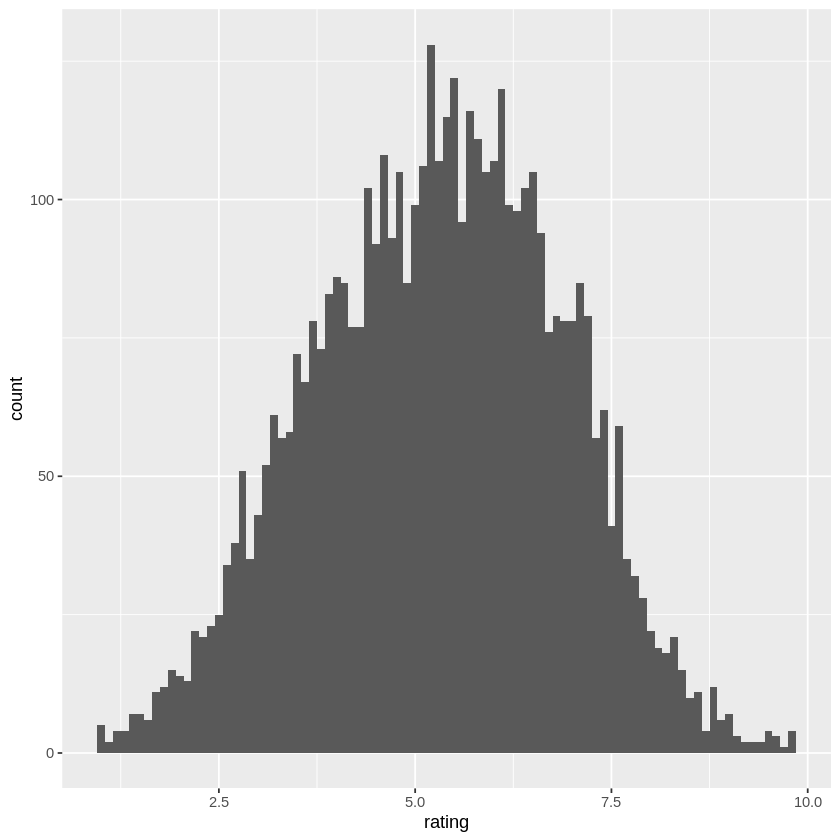

In [2]:
movies %>%
    filter(Action == 1) %>%
    ggplot(aes(x=rating)) +
    geom_histogram(binwidth=0.1)

In [3]:
movies %>%
    filter(Romance==1 & votes > 1000) %>%
    arrange(desc(rating)) %>%
    head(1)

title,year,length,budget,rating,votes,r1,r2,r3,r4,⋯,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
<chr>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Casablanca,1942,102,950000,8.8,66030,4.5,4.5,4.5,4.5,⋯,24.5,44.5,,0,0,0,1,0,1,0


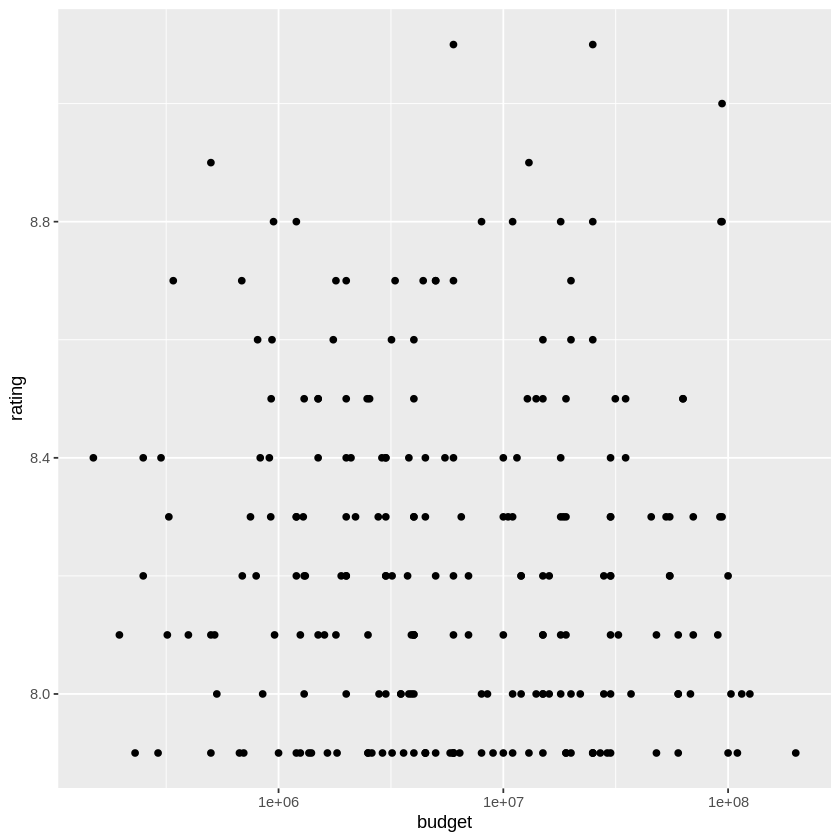

In [4]:
movies %>%
    filter(votes > 1000 & ! is.na(budget)) %>%
    top_n(rating,n=200) %>%
    ggplot(aes(x=budget,y=rating)) +
    geom_point() +
    scale_x_log10()